In [1]:
import tensorflow as tf
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Ntrain = 10000
Ntest  = 10000
print("\033[92mGenerating the parabola data set\033[0m")
X_train = []
Y_train = []
X_test  = []
Y_test  = []

Nx = 100
xarr = np.linspace(0,20,Nx)

#--------------------------------------------------------------------
# Swapping around, parameters of parabola as input, x values fixed
def parabola(p=None):
    if p==None:
        p = np.random.uniform(size=3)
        y = np.sum([p[i]*xarr**i for i in range(len(p))], axis=0)
        assert np.shape(y)==np.shape(xarr)
        return p, y
    else:
        y = np.sum([p[i]*xarr**i for i in range(len(p))], axis=0)
        print(np.shape(y))
        assert np.shape(y)==np.shape(xarr)
        return y
#--------------------------------------------------------------------
  
for i in range( Ntrain ):
  x,y = parabola()
  X_train.append(x)
  Y_train.append(y)

for i in range( Ntest ):
  x,y = parabola()
  X_test.append(x)
  Y_test.append(y)

# convert to nparrays
x_test  = np.array(X_test)
y_test  = np.array(Y_test)
x_train = np.array(X_train)
y_train = np.array(Y_train)

print("Have generated the following data:")
print("\tN(test)  = ", len(x_test))
print("\tN(train) = ", len(x_train))



Generating the parabola data set
Have generated the following data:
	N(test)  =  10000
	N(train) =  10000


In [2]:
#
# Training configuration
#
ValidationSplit = 0.5
BatchSize       = 100
Nepochs         = 100
DropoutValue    = 0.2


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200, input_dim=3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(400, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(200, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(Nx)
])


# now specify the loss function 
loss_fn = tf.keras.losses.MeanSquaredError()

model.compile(optimizer='adam', loss=loss_fn)
history  = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)

Epoch 1/100
50/50 [==============================] - 0s 10ms/step - loss: 8963.7764 - val_loss: 2745.1313
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 1287.4283 - val_loss: 489.5139
Epoch 3/100
50/50 [==============================] - 0s 7ms/step - loss: 242.8341 - val_loss: 23.7898
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 87.5928 - val_loss: 7.2993
Epoch 5/100
50/50 [==============================] - 0s 7ms/step - loss: 73.2692 - val_loss: 3.6217
Epoch 6/100
50/50 [==============================] - 0s 7ms/step - loss: 66.6409 - val_loss: 3.1021
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 62.9208 - val_loss: 2.6354
Epoch 8/100
50/50 [==============================] - 0s 8ms/step - loss: 58.7357 - val_loss: 2.6189
Epoch 9/100
50/50 [==============================] - 0s 7ms/step - loss: 54.4174 - val_loss: 3.4778
Epoch 10/100
50/50 [==============================] - 0s 7ms/step - loss: 52.0069 - val_

50/50 [==============================] - 0s 8ms/step - loss: 16.7326 - val_loss: 0.2044
Epoch 83/100
50/50 [==============================] - 0s 7ms/step - loss: 16.4889 - val_loss: 1.4594
Epoch 84/100
50/50 [==============================] - 0s 7ms/step - loss: 16.4708 - val_loss: 4.9649
Epoch 85/100
50/50 [==============================] - 0s 7ms/step - loss: 15.9386 - val_loss: 0.5374
Epoch 86/100
50/50 [==============================] - 0s 7ms/step - loss: 16.8171 - val_loss: 0.5584
Epoch 87/100
50/50 [==============================] - 0s 8ms/step - loss: 17.6299 - val_loss: 4.3818
Epoch 88/100
50/50 [==============================] - 0s 8ms/step - loss: 16.6243 - val_loss: 0.5447
Epoch 89/100
50/50 [==============================] - 0s 9ms/step - loss: 16.1120 - val_loss: 0.3400
Epoch 90/100
50/50 [==============================] - 1s 11ms/step - loss: 17.1103 - val_loss: 4.9074
Epoch 91/100
50/50 [==============================] - 0s 8ms/step - loss: 16.4879 - val_loss: 2.1166
Ep

Display the evolution of the loss as a function of the training epoch

  N(Epochs)        =  100


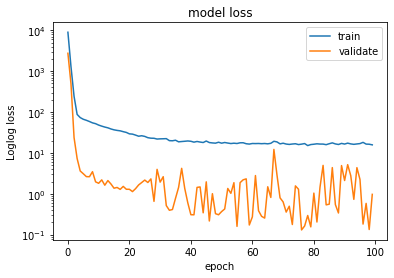

313/313 - 1s - loss: 0.9702
loss = 0.970


<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", Nepochs)
#print("  loss (train)     = ", history.history['loss'])
#print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.semilogy(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loglog loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss = model.evaluate(x_test,  y_test, verbose=2)
print("loss = {:5.3f}".format(loss))

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


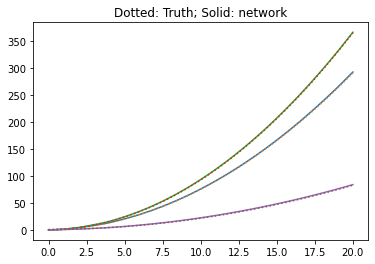

In [4]:
import matplotlib.pyplot as plt
def test(p):
    ytrue = parabola(p)
    print(np.shape(ytrue))
    ytest = model.predict([p])
    plt.plot(xarr, ytest[0])
    plt.plot(xarr, ytrue, linestyle='dotted')
    plt.title('Dotted: Truth; Solid: network')

test([0.4,0.5,0.7])
test([0.7,0.2,0.9])
test([0.9,0.1,0.2])